In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('../sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = len(numbers)

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 4435
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 97)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
number_codes = []
for i in range(2**5, 2**6-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**5 - 1,6).T.tolist() 

In [7]:
classes = []
for i in range(2**5 - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []
#classes = [[0],[0,5],[0,4],[0,4,5],[0,3],[0,3,5],[0,3,4],[0,3,4,5],[0,2],[0,2,5],[0,2,4],[0,2,4,5],[0,2,3],[0,2,3,5],[0,2,3,4],[0,2,3,4,5],[0,1],[0,1,5],[0,1,4],[0,1,4,5],[0,1,3],[0,1,3,5],[0,1,3,4],[0,1,3,4,5],[0,1,2],[0,1,2,5],[0,1,2,4],[0,1,2,4,5],[0,1,2,3],[0,1,2,3,5],[0,1,2,3,4]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1072
number of class2:3363

 ****** Running generation 0 ****** 

Population's average fitness: 0.60678 stdev: 0.22694
Best fitness: 0.92063 - size: (2, 7) - species 3 - id 70
Average adjusted fitness: 0.422
Mean genetic distance 2.905, standard deviation 0.494
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 17.563 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59787 stdev: 0.23327
Best fitness: 0.92063 - size: (2, 7) - species 3 - id 70
Average adjusted fitness: 0.457
Mean genetic distance 2.977, standard deviation 0.511
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 17.459 sec (17.511 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64532 stdev: 0.20950
Best fitness: 0.92063 - size: (2, 7) - species 23 - id 70
Average adjusted fitness: 0.430
Mean genetic distance 3.007, standard deviation 0.523
Population of 202 members in 28 species
Total extinctio

Population's average fitness: 0.59396 stdev: 0.25328
Best fitness: 0.96212 - size: (3, 8) - species 23 - id 2633
Average adjusted fitness: 0.329
Mean genetic distance 3.107, standard deviation 0.571
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 22.259 sec (21.238 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62049 stdev: 0.24340
Best fitness: 0.96212 - size: (3, 8) - species 23 - id 2633
Average adjusted fitness: 0.440
Mean genetic distance 3.146, standard deviation 0.544
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 21.951 sec (21.610 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.59778 stdev: 0.25393
Best fitness: 0.96212 - size: (3, 8) - species 23 - id 2633
Average adjusted fitness: 0.380
Mean genetic distance 3.180, standard deviation 0.538
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 22.764 sec (21.970 average)

 ***

Total extinctions: 0
Generation time: 24.891 sec (24.871 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.66580 stdev: 0.22420
Best fitness: 0.96573 - size: (5, 14) - species 11 - id 6328
Average adjusted fitness: 0.450
Mean genetic distance 3.157, standard deviation 0.584
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 25.682 sec (25.056 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.64648 stdev: 0.23826
Best fitness: 0.96573 - size: (5, 14) - species 11 - id 6328
Average adjusted fitness: 0.405
Mean genetic distance 3.117, standard deviation 0.604
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 24.915 sec (25.083 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.67557 stdev: 0.21323
Best fitness: 0.96573 - size: (5, 14) - species 11 - id 6328
Average adjusted fitness: 0.434
Mean genetic distance 3.105, standard deviation 0.594
Po

Mean genetic distance 3.020, standard deviation 0.564
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 25.394 sec (26.180 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.66569 stdev: 0.21922
Best fitness: 0.96618 - size: (8, 21) - species 60 - id 9168
Average adjusted fitness: 0.437
Mean genetic distance 2.994, standard deviation 0.573
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 25.432 sec (26.100 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.67251 stdev: 0.21301
Best fitness: 0.96618 - size: (8, 21) - species 60 - id 9168
Average adjusted fitness: 0.432
Mean genetic distance 3.059, standard deviation 0.607
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 25.272 sec (25.985 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.64049 stdev: 0.22974
Best fitness: 0.96618 - size: (8, 21) - species 60 - id

Mean genetic distance 3.212, standard deviation 0.578
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 29.330 sec (28.767 average)
number of class1:2110
number of class2:2325

 ****** Running generation 0 ****** 

Population's average fitness: 0.51053 stdev: 0.03527
Best fitness: 0.62435 - size: (2, 7) - species 2 - id 101
Average adjusted fitness: 0.225
Mean genetic distance 2.872, standard deviation 0.524
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 15.215 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51412 stdev: 0.03343
Best fitness: 0.62435 - size: (2, 7) - species 2 - id 101
Average adjusted fitness: 0.134
Mean genetic distance 2.976, standard deviation 0.548
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 16.266 sec (15.741 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.51319 stdev: 0.03401
Best fitness: 0.62435 - size: (2, 7) 

Mean genetic distance 3.097, standard deviation 0.584
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 19.968 sec (20.035 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.53833 stdev: 0.05234
Best fitness: 0.68884 - size: (6, 15) - species 36 - id 3511
Average adjusted fitness: 0.126
Mean genetic distance 3.137, standard deviation 0.576
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 21.589 sec (20.294 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.53924 stdev: 0.05370
Best fitness: 0.68884 - size: (6, 15) - species 36 - id 3511
Average adjusted fitness: 0.117
Mean genetic distance 3.134, standard deviation 0.574
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 21.170 sec (20.331 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.53700 stdev: 0.05600
Best fitness: 0.68884 - size: (6, 15) - species 36 - id

Generation time: 24.100 sec (24.623 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.52793 stdev: 0.05367
Best fitness: 0.71229 - size: (7, 18) - species 36 - id 6839
Average adjusted fitness: 0.084
Mean genetic distance 3.197, standard deviation 0.662
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 23.478 sec (24.615 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.52813 stdev: 0.05464
Best fitness: 0.71229 - size: (7, 18) - species 36 - id 6839
Average adjusted fitness: 0.123
Mean genetic distance 3.184, standard deviation 0.634
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 22.481 sec (24.586 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.53147 stdev: 0.05545
Best fitness: 0.71229 - size: (7, 18) - species 36 - id 6839
Average adjusted fitness: 0.112
Mean genetic distance 3.203, standard deviation 0.647
Population of 197 membe

Total extinctions: 0
Generation time: 22.264 sec (23.108 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.53923 stdev: 0.06127
Best fitness: 0.72379 - size: (8, 20) - species 48 - id 11569
Average adjusted fitness: 0.143
Mean genetic distance 3.051, standard deviation 0.552
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 22.760 sec (23.039 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.53362 stdev: 0.06102
Best fitness: 0.72379 - size: (8, 20) - species 48 - id 11569
Average adjusted fitness: 0.073
Mean genetic distance 3.063, standard deviation 0.546
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 23.230 sec (23.028 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.53735 stdev: 0.06527
Best fitness: 0.72379 - size: (8, 20) - species 57 - id 11569
Average adjusted fitness: 0.097
Mean genetic distance 3.078, standard deviation 0.539

Mean genetic distance 3.183, standard deviation 0.568
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 27.096 sec (25.724 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.55146 stdev: 0.06503
Best fitness: 0.72379 - size: (8, 20) - species 59 - id 11569
Average adjusted fitness: 0.113
Mean genetic distance 3.176, standard deviation 0.580
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 25.754 sec (25.910 average)
number of class1:1542
number of class2:2893

 ****** Running generation 0 ****** 

Population's average fitness: 0.56490 stdev: 0.13766
Best fitness: 0.84374 - size: (2, 7) - species 6 - id 37
Average adjusted fitness: 0.388
Mean genetic distance 2.845, standard deviation 0.477
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 14.057 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58132 stdev: 0.12866
Best fitness: 0.84374 - size: (2,

Total extinctions: 0
Generation time: 22.028 sec (19.009 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.56927 stdev: 0.15398
Best fitness: 0.88794 - size: (6, 14) - species 30 - id 3392
Average adjusted fitness: 0.325
Mean genetic distance 3.071, standard deviation 0.554
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 24.455 sec (19.632 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.57722 stdev: 0.15535
Best fitness: 0.88794 - size: (6, 14) - species 30 - id 3392
Average adjusted fitness: 0.332
Mean genetic distance 3.082, standard deviation 0.555
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 19.026 sec (19.652 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.58922 stdev: 0.15085
Best fitness: 0.88794 - size: (6, 14) - species 30 - id 3392
Average adjusted fitness: 0.392
Mean genetic distance 3.102, standard deviation 0.567
Po

Mean genetic distance 3.241, standard deviation 0.571
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 23.555 sec (22.850 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.59221 stdev: 0.17299
Best fitness: 0.89876 - size: (6, 14) - species 30 - id 6679
Average adjusted fitness: 0.304
Mean genetic distance 3.248, standard deviation 0.577
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 23.917 sec (23.007 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.60574 stdev: 0.16210
Best fitness: 0.89876 - size: (6, 14) - species 30 - id 6679
Average adjusted fitness: 0.376
Mean genetic distance 3.249, standard deviation 0.598
Population of 206 members in 20 species
Total extinctions: 0
Generation time: 23.907 sec (23.281 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.59704 stdev: 0.15434
Best fitness: 0.89876 - size: (6, 14) - species 30 - id

Mean genetic distance 3.282, standard deviation 0.583
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 24.094 sec (23.859 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.60674 stdev: 0.15324
Best fitness: 0.90530 - size: (10, 19) - species 45 - id 9601
Average adjusted fitness: 0.349
Mean genetic distance 3.298, standard deviation 0.568
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 25.280 sec (23.906 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.60120 stdev: 0.15981
Best fitness: 0.90530 - size: (10, 19) - species 45 - id 9601
Average adjusted fitness: 0.405
Mean genetic distance 3.308, standard deviation 0.563
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 25.529 sec (24.049 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.59820 stdev: 0.16079
Best fitness: 0.90530 - size: (10, 19) - species 45 -

Mean genetic distance 3.152, standard deviation 0.587
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 33.356 sec (32.254 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.61023 stdev: 0.16556
Best fitness: 0.90530 - size: (10, 19) - species 45 - id 9601
Average adjusted fitness: 0.265
Mean genetic distance 3.142, standard deviation 0.575
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 34.313 sec (32.634 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.60854 stdev: 0.16171
Best fitness: 0.90530 - size: (10, 19) - species 45 - id 9601
Average adjusted fitness: 0.358
Mean genetic distance 3.120, standard deviation 0.562
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 34.171 sec (33.048 average)
number of class1:2580
number of class2:1855

 ****** Running generation 0 ****** 

Population's average fitness: 0.46279 stdev: 0.08313
Best fitne

Population of 198 members in 28 species
Total extinctions: 0
Generation time: 19.764 sec (19.595 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.55783 stdev: 0.10369
Best fitness: 0.68636 - size: (9, 23) - species 25 - id 3267
Average adjusted fitness: 0.225
Mean genetic distance 3.074, standard deviation 0.543
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 21.151 sec (19.733 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.56848 stdev: 0.10055
Best fitness: 0.68636 - size: (9, 23) - species 25 - id 3267
Average adjusted fitness: 0.234
Mean genetic distance 3.087, standard deviation 0.552
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 21.917 sec (20.051 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.55553 stdev: 0.10486
Best fitness: 0.68636 - size: (9, 23) - species 25 - id 3267
Average adjusted fitness: 0.218
Mean genetic dis

Mean genetic distance 3.092, standard deviation 0.534
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 23.911 sec (24.648 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.55074 stdev: 0.09749
Best fitness: 0.68636 - size: (9, 23) - species 25 - id 3267
Average adjusted fitness: 0.185
Mean genetic distance 3.095, standard deviation 0.539
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 23.405 sec (24.552 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.54637 stdev: 0.10714
Best fitness: 0.68636 - size: (9, 23) - species 25 - id 3267
Average adjusted fitness: 0.210
Mean genetic distance 3.106, standard deviation 0.542
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 23.097 sec (24.272 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.55358 stdev: 0.10165
Best fitness: 0.68636 - size: (9, 23) - species 25 - id

Mean genetic distance 3.253, standard deviation 0.537
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 24.482 sec (24.738 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.55972 stdev: 0.11158
Best fitness: 0.68636 - size: (9, 23) - species 25 - id 3267
Average adjusted fitness: 0.165
Mean genetic distance 3.234, standard deviation 0.542
Population of 204 members in 20 species
Total extinctions: 0
Generation time: 25.782 sec (24.834 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.56726 stdev: 0.10330
Best fitness: 0.68636 - size: (9, 23) - species 25 - id 3267
Average adjusted fitness: 0.175
Mean genetic distance 3.228, standard deviation 0.544
Population of 207 members in 20 species
Total extinctions: 0
Generation time: 26.008 sec (24.819 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.56823 stdev: 0.10538
Best fitness: 0.68636 - size: (9, 23) - species 25 - id

Mean genetic distance 3.148, standard deviation 0.593
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 28.856 sec (27.921 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.55601 stdev: 0.10502
Best fitness: 0.68636 - size: (9, 23) - species 25 - id 3267
Average adjusted fitness: 0.214
Mean genetic distance 3.164, standard deviation 0.568
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 27.871 sec (27.958 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.55034 stdev: 0.10449
Best fitness: 0.68636 - size: (9, 23) - species 25 - id 3267
Average adjusted fitness: 0.212
Mean genetic distance 3.173, standard deviation 0.580
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 29.194 sec (27.463 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.55056 stdev: 0.10529
Best fitness: 0.68636 - size: (9, 23) - species 25 - id


 ****** Running generation 21 ****** 

Population's average fitness: 0.59427 stdev: 0.16656
Best fitness: 0.87351 - size: (4, 11) - species 28 - id 3142
Average adjusted fitness: 0.241
Mean genetic distance 3.094, standard deviation 0.577
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 18.965 sec (18.333 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.57390 stdev: 0.17423
Best fitness: 0.87351 - size: (4, 11) - species 28 - id 3142
Average adjusted fitness: 0.241
Mean genetic distance 3.132, standard deviation 0.560
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 19.978 sec (18.453 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.58494 stdev: 0.17274
Best fitness: 0.87351 - size: (4, 11) - species 28 - id 3142
Average adjusted fitness: 0.452
Mean genetic distance 3.099, standard deviation 0.557
Population of 196 members in 20 species
Total extinctions: 0
Generat

Population's average fitness: 0.59281 stdev: 0.17640
Best fitness: 0.87373 - size: (7, 18) - species 24 - id 3986
Average adjusted fitness: 0.405
Mean genetic distance 3.212, standard deviation 0.578
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 22.622 sec (20.992 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.61817 stdev: 0.16857
Best fitness: 0.87373 - size: (7, 18) - species 24 - id 3986
Average adjusted fitness: 0.284
Mean genetic distance 3.210, standard deviation 0.575
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 21.441 sec (21.041 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.61527 stdev: 0.16541
Best fitness: 0.87373 - size: (7, 18) - species 24 - id 3986
Average adjusted fitness: 0.306
Mean genetic distance 3.211, standard deviation 0.566
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 21.313 sec (21.108 average)

 

Population's average fitness: 0.61451 stdev: 0.19115
Best fitness: 0.87621 - size: (12, 22) - species 57 - id 9972
Average adjusted fitness: 0.292
Mean genetic distance 3.224, standard deviation 0.580
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 22.156 sec (22.445 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.63110 stdev: 0.17710
Best fitness: 0.87621 - size: (12, 22) - species 57 - id 9972
Average adjusted fitness: 0.301
Mean genetic distance 3.197, standard deviation 0.576
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 23.454 sec (22.516 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.61008 stdev: 0.19530
Best fitness: 0.87621 - size: (12, 22) - species 57 - id 9972
Average adjusted fitness: 0.275
Mean genetic distance 3.179, standard deviation 0.570
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 22.135 sec (22.483 average)

Population's average fitness: 0.60059 stdev: 0.18297
Best fitness: 0.87666 - size: (9, 21) - species 58 - id 13431
Average adjusted fitness: 0.245
Mean genetic distance 3.080, standard deviation 0.594
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 26.638 sec (26.725 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.60265 stdev: 0.18209
Best fitness: 0.87666 - size: (9, 21) - species 58 - id 13431
Average adjusted fitness: 0.256
Mean genetic distance 3.087, standard deviation 0.601
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 27.109 sec (26.792 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.62729 stdev: 0.17896
Best fitness: 0.87666 - size: (9, 21) - species 58 - id 13431
Average adjusted fitness: 0.289
Mean genetic distance 3.067, standard deviation 0.584
Population of 204 members in 10 species
Total extinctions: 0
Generation time: 28.449 sec (26.996 average)

Population's average fitness: 0.56509 stdev: 0.10773
Best fitness: 0.71793 - size: (4, 11) - species 17 - id 2955
Average adjusted fitness: 0.266
Mean genetic distance 3.244, standard deviation 0.531
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 19.944 sec (19.994 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.56951 stdev: 0.10925
Best fitness: 0.72627 - size: (7, 15) - species 8 - id 3140
Average adjusted fitness: 0.229
Mean genetic distance 3.273, standard deviation 0.540
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 20.287 sec (20.051 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.57043 stdev: 0.10749
Best fitness: 0.72649 - size: (8, 18) - species 8 - id 3281
Average adjusted fitness: 0.216
Mean genetic distance 3.287, standard deviation 0.565
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 19.939 sec (20.142 average)

 **

Population's average fitness: 0.56306 stdev: 0.11335
Best fitness: 0.73303 - size: (9, 19) - species 8 - id 5389
Average adjusted fitness: 0.245
Mean genetic distance 3.237, standard deviation 0.559
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 23.972 sec (23.782 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.57002 stdev: 0.11556
Best fitness: 0.73303 - size: (9, 19) - species 8 - id 5389
Average adjusted fitness: 0.252
Mean genetic distance 3.224, standard deviation 0.559
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 23.692 sec (23.971 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.56601 stdev: 0.11011
Best fitness: 0.73303 - size: (9, 19) - species 8 - id 5389
Average adjusted fitness: 0.291
Mean genetic distance 3.249, standard deviation 0.561
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 24.026 sec (24.081 average)

 ***

Population's average fitness: 0.57332 stdev: 0.11056
Best fitness: 0.73303 - size: (9, 19) - species 8 - id 5389
Average adjusted fitness: 0.267
Mean genetic distance 3.275, standard deviation 0.574
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 27.064 sec (25.628 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.55574 stdev: 0.11488
Best fitness: 0.73303 - size: (9, 19) - species 8 - id 5389
Average adjusted fitness: 0.134
Mean genetic distance 3.249, standard deviation 0.566
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 26.326 sec (25.830 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.56839 stdev: 0.11426
Best fitness: 0.73303 - size: (9, 19) - species 8 - id 5389
Average adjusted fitness: 0.216
Mean genetic distance 3.285, standard deviation 0.542
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 26.487 sec (25.959 average)

 ***

Population's average fitness: 0.56874 stdev: 0.11411
Best fitness: 0.73980 - size: (8, 17) - species 52 - id 12241
Average adjusted fitness: 0.209
Mean genetic distance 3.246, standard deviation 0.583
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 30.943 sec (29.757 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.55362 stdev: 0.11680
Best fitness: 0.73980 - size: (8, 17) - species 52 - id 12241
Average adjusted fitness: 0.217
Mean genetic distance 3.198, standard deviation 0.587
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 29.866 sec (29.808 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.55542 stdev: 0.11567
Best fitness: 0.73980 - size: (8, 17) - species 52 - id 12241
Average adjusted fitness: 0.129
Mean genetic distance 3.186, standard deviation 0.574
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 28.771 sec (29.756 average)

Total extinctions: 0
Generation time: 17.827 sec (18.089 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.55307 stdev: 0.09029
Best fitness: 0.77903 - size: (5, 13) - species 28 - id 2158
Average adjusted fitness: 0.271
Mean genetic distance 3.070, standard deviation 0.568
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 20.856 sec (18.413 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.55071 stdev: 0.09071
Best fitness: 0.77903 - size: (5, 13) - species 28 - id 2158
Average adjusted fitness: 0.145
Mean genetic distance 3.059, standard deviation 0.557
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 20.045 sec (18.619 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.54483 stdev: 0.09506
Best fitness: 0.77903 - size: (5, 13) - species 35 - id 2158
Average adjusted fitness: 0.251
Mean genetic distance 3.168, standard deviation 0.558
Po

Mean genetic distance 3.069, standard deviation 0.586
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 21.091 sec (21.149 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.56261 stdev: 0.09548
Best fitness: 0.80722 - size: (6, 15) - species 32 - id 5401
Average adjusted fitness: 0.120
Mean genetic distance 3.079, standard deviation 0.586
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 21.543 sec (21.254 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.56531 stdev: 0.09772
Best fitness: 0.80722 - size: (6, 15) - species 32 - id 5401
Average adjusted fitness: 0.202
Mean genetic distance 3.069, standard deviation 0.583
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 21.936 sec (21.173 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.55990 stdev: 0.09552
Best fitness: 0.80722 - size: (6, 15) - species 32 - id

Total extinctions: 0
Generation time: 21.729 sec (21.242 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.54994 stdev: 0.10576
Best fitness: 0.81781 - size: (7, 19) - species 59 - id 9688
Average adjusted fitness: 0.276
Mean genetic distance 3.003, standard deviation 0.567
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 21.132 sec (21.233 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.55663 stdev: 0.10712
Best fitness: 0.81781 - size: (7, 19) - species 59 - id 9688
Average adjusted fitness: 0.266
Mean genetic distance 2.992, standard deviation 0.551
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 20.855 sec (21.140 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.55673 stdev: 0.10761
Best fitness: 0.81781 - size: (7, 19) - species 59 - id 9688
Average adjusted fitness: 0.288
Mean genetic distance 2.993, standard deviation 0.549
Po

Total extinctions: 0
Generation time: 23.674 sec (23.449 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.55159 stdev: 0.09665
Best fitness: 0.81781 - size: (7, 19) - species 59 - id 9688
Average adjusted fitness: 0.208
Mean genetic distance 2.949, standard deviation 0.543
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 22.956 sec (23.462 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.55373 stdev: 0.10225
Best fitness: 0.81781 - size: (7, 19) - species 59 - id 9688
Average adjusted fitness: 0.242
Mean genetic distance 2.975, standard deviation 0.541
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 23.140 sec (23.419 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.54724 stdev: 0.09590
Best fitness: 0.81781 - size: (7, 19) - species 59 - id 9688
Average adjusted fitness: 0.203
Mean genetic distance 2.952, standard deviation 0.549
Po

Mean genetic distance 3.243, standard deviation 0.501
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 21.500 sec (20.459 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58750 stdev: 0.18448
Best fitness: 0.77384 - size: (8, 21) - species 9 - id 2278
Average adjusted fitness: 0.351
Mean genetic distance 3.235, standard deviation 0.493
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 21.120 sec (20.597 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61929 stdev: 0.17372
Best fitness: 0.77384 - size: (8, 21) - species 9 - id 2278
Average adjusted fitness: 0.309
Mean genetic distance 3.207, standard deviation 0.494
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 21.075 sec (20.715 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60957 stdev: 0.17612
Best fitness: 0.77384 - size: (8, 21) - species 9 - id 22

Mean genetic distance 3.231, standard deviation 0.521
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 25.125 sec (23.180 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.60533 stdev: 0.17978
Best fitness: 0.77497 - size: (8, 23) - species 9 - id 3056
Average adjusted fitness: 0.279
Mean genetic distance 3.240, standard deviation 0.532
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 23.844 sec (23.351 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.60535 stdev: 0.18075
Best fitness: 0.77497 - size: (8, 23) - species 9 - id 3056
Average adjusted fitness: 0.315
Mean genetic distance 3.241, standard deviation 0.538
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 23.803 sec (23.437 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.59167 stdev: 0.18316
Best fitness: 0.77497 - size: (8, 23) - species 9 - id 30

Mean genetic distance 3.233, standard deviation 0.568
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 25.494 sec (24.721 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.59093 stdev: 0.19259
Best fitness: 0.77700 - size: (4, 10) - species 58 - id 7520
Average adjusted fitness: 0.336
Mean genetic distance 3.193, standard deviation 0.578
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 25.185 sec (24.789 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.60655 stdev: 0.18155
Best fitness: 0.77700 - size: (4, 10) - species 58 - id 7520
Average adjusted fitness: 0.367
Mean genetic distance 3.179, standard deviation 0.565
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 26.139 sec (25.016 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.60714 stdev: 0.17871
Best fitness: 0.77700 - size: (4, 10) - species 58 - id

Mean genetic distance 3.025, standard deviation 0.615
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 29.726 sec (29.549 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.57020 stdev: 0.19042
Best fitness: 0.77700 - size: (4, 10) - species 58 - id 7520
Average adjusted fitness: 0.315
Mean genetic distance 3.007, standard deviation 0.598
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 29.798 sec (29.598 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.57509 stdev: 0.19145
Best fitness: 0.77700 - size: (4, 10) - species 58 - id 7520
Average adjusted fitness: 0.320
Mean genetic distance 3.009, standard deviation 0.609
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 29.077 sec (29.601 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.57462 stdev: 0.18953
Best fitness: 0.77700 - size: (4, 10) - species 58 - id

Mean genetic distance 3.099, standard deviation 0.476
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 19.501 sec (19.032 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.54929 stdev: 0.07270
Best fitness: 0.78895 - size: (3, 10) - species 17 - id 1839
Average adjusted fitness: 0.171
Mean genetic distance 3.119, standard deviation 0.475
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 19.056 sec (19.145 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.54821 stdev: 0.07842
Best fitness: 0.78895 - size: (3, 10) - species 17 - id 1839
Average adjusted fitness: 0.203
Mean genetic distance 3.120, standard deviation 0.493
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 19.335 sec (19.192 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.55346 stdev: 0.07605
Best fitness: 0.78895 - size: (3, 10) - species 17 - id

Mean genetic distance 3.090, standard deviation 0.532
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 23.525 sec (22.758 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.56419 stdev: 0.09292
Best fitness: 0.79729 - size: (7, 14) - species 26 - id 4739
Average adjusted fitness: 0.216
Mean genetic distance 3.099, standard deviation 0.538
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 23.905 sec (22.948 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.57093 stdev: 0.09185
Best fitness: 0.80203 - size: (4, 16) - species 49 - id 6083
Average adjusted fitness: 0.172
Mean genetic distance 3.093, standard deviation 0.546
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 24.148 sec (23.161 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.56861 stdev: 0.09394
Best fitness: 0.82120 - size: (5, 11) - species 17 - id

Mean genetic distance 3.289, standard deviation 0.605
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 25.892 sec (24.336 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.56208 stdev: 0.09668
Best fitness: 0.82120 - size: (5, 11) - species 57 - id 6246
Average adjusted fitness: 0.135
Mean genetic distance 3.292, standard deviation 0.596
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 24.591 sec (24.363 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.56389 stdev: 0.10121
Best fitness: 0.82120 - size: (5, 11) - species 57 - id 6246
Average adjusted fitness: 0.177
Mean genetic distance 3.301, standard deviation 0.580
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 25.093 sec (24.395 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.57647 stdev: 0.10399
Best fitness: 0.82120 - size: (5, 11) - species 57 - id

Mean genetic distance 3.231, standard deviation 0.625
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 30.979 sec (26.498 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.58552 stdev: 0.10609
Best fitness: 0.83427 - size: (9, 23) - species 67 - id 13355
Average adjusted fitness: 0.183
Mean genetic distance 3.186, standard deviation 0.640
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 27.456 sec (26.701 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.57564 stdev: 0.11061
Best fitness: 0.83427 - size: (9, 23) - species 67 - id 13355
Average adjusted fitness: 0.319
Mean genetic distance 3.182, standard deviation 0.623
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 27.520 sec (26.917 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.57530 stdev: 0.10723
Best fitness: 0.83427 - size: (9, 23) - species 67 - 

Mean genetic distance 3.083, standard deviation 0.503
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 19.874 sec (19.479 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60611 stdev: 0.21714
Best fitness: 0.85186 - size: (5, 11) - species 34 - id 1996
Average adjusted fitness: 0.360
Mean genetic distance 3.064, standard deviation 0.517
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 19.548 sec (19.634 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60067 stdev: 0.22100
Best fitness: 0.85186 - size: (5, 11) - species 34 - id 1996
Average adjusted fitness: 0.368
Mean genetic distance 3.067, standard deviation 0.516
Population of 191 members in 32 species
Total extinctions: 0
Generation time: 21.118 sec (19.870 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59430 stdev: 0.22380
Best fitness: 0.85186 - size: (5, 11) - species 34 - id

Total extinctions: 0
Generation time: 23.304 sec (23.326 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.57182 stdev: 0.22468
Best fitness: 0.85524 - size: (6, 17) - species 32 - id 5803
Average adjusted fitness: 0.336
Mean genetic distance 3.164, standard deviation 0.553
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 23.424 sec (23.401 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.58081 stdev: 0.22040
Best fitness: 0.85524 - size: (6, 17) - species 32 - id 5803
Average adjusted fitness: 0.266
Mean genetic distance 3.176, standard deviation 0.543
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 24.708 sec (23.584 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.57770 stdev: 0.22341
Best fitness: 0.85524 - size: (6, 17) - species 32 - id 5803
Average adjusted fitness: 0.381
Mean genetic distance 3.208, standard deviation 0.541
Po

Mean genetic distance 3.273, standard deviation 0.589
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 25.864 sec (26.102 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.62951 stdev: 0.20866
Best fitness: 0.86359 - size: (8, 16) - species 56 - id 9824
Average adjusted fitness: 0.382
Mean genetic distance 3.261, standard deviation 0.591
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 27.005 sec (26.295 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.61359 stdev: 0.21914
Best fitness: 0.86359 - size: (8, 16) - species 56 - id 9824
Average adjusted fitness: 0.395
Mean genetic distance 3.265, standard deviation 0.580
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 27.380 sec (26.534 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.61208 stdev: 0.21802
Best fitness: 0.86359 - size: (8, 16) - species 56 - id

Mean genetic distance 3.258, standard deviation 0.602
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 27.964 sec (29.240 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.59873 stdev: 0.22896
Best fitness: 0.86697 - size: (10, 24) - species 56 - id 12303
Average adjusted fitness: 0.398
Mean genetic distance 3.247, standard deviation 0.609
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 29.591 sec (29.238 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.57579 stdev: 0.23014
Best fitness: 0.86697 - size: (10, 24) - species 56 - id 12303
Average adjusted fitness: 0.284
Mean genetic distance 3.211, standard deviation 0.597
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 30.332 sec (29.352 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.62011 stdev: 0.21818
Best fitness: 0.86697 - size: (10, 24) - species 56

Mean genetic distance 3.118, standard deviation 0.534
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 19.963 sec (19.163 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.54875 stdev: 0.10237
Best fitness: 0.73912 - size: (3, 10) - species 19 - id 2100
Average adjusted fitness: 0.194
Mean genetic distance 3.129, standard deviation 0.528
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 19.196 sec (19.328 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.55582 stdev: 0.10199
Best fitness: 0.76234 - size: (6, 18) - species 5 - id 2446
Average adjusted fitness: 0.232
Mean genetic distance 3.122, standard deviation 0.531
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 19.184 sec (19.390 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.55703 stdev: 0.10190
Best fitness: 0.76234 - size: (6, 18) - species 19 - id 

Mean genetic distance 3.228, standard deviation 0.565
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 23.010 sec (23.244 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.55383 stdev: 0.10277
Best fitness: 0.76234 - size: (6, 18) - species 39 - id 2446
Average adjusted fitness: 0.213
Mean genetic distance 3.275, standard deviation 0.558
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 22.977 sec (23.174 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.55375 stdev: 0.10404
Best fitness: 0.76234 - size: (6, 18) - species 39 - id 2446
Average adjusted fitness: 0.198
Mean genetic distance 3.281, standard deviation 0.553
Population of 192 members in 20 species
Total extinctions: 0
Generation time: 23.988 sec (23.286 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.55849 stdev: 0.10174
Best fitness: 0.76234 - size: (6, 18) - species 39 - id

Mean genetic distance 3.159, standard deviation 0.572
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 25.044 sec (25.471 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.53981 stdev: 0.10039
Best fitness: 0.77384 - size: (7, 18) - species 39 - id 8652
Average adjusted fitness: 0.181
Mean genetic distance 3.139, standard deviation 0.534
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 26.170 sec (25.449 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.54008 stdev: 0.10061
Best fitness: 0.77384 - size: (7, 18) - species 39 - id 8652
Average adjusted fitness: 0.185
Mean genetic distance 3.163, standard deviation 0.523
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 25.805 sec (25.463 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.55234 stdev: 0.09513
Best fitness: 0.77384 - size: (7, 18) - species 39 - id

Mean genetic distance 3.201, standard deviation 0.572
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 31.831 sec (30.904 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.55508 stdev: 0.11330
Best fitness: 0.77993 - size: (13, 29) - species 45 - id 13180
Average adjusted fitness: 0.208
Mean genetic distance 3.203, standard deviation 0.557
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 33.431 sec (31.325 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.55093 stdev: 0.11191
Best fitness: 0.77993 - size: (13, 29) - species 45 - id 13180
Average adjusted fitness: 0.189
Mean genetic distance 3.206, standard deviation 0.551
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 34.690 sec (31.780 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.54532 stdev: 0.11061
Best fitness: 0.77993 - size: (13, 29) - species 45

Mean genetic distance 3.134, standard deviation 0.491
Population of 209 members in 40 species
Total extinctions: 0
Generation time: 20.276 sec (19.035 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61772 stdev: 0.30227
Best fitness: 0.89132 - size: (3, 12) - species 39 - id 1296
Average adjusted fitness: 0.439
Mean genetic distance 3.138, standard deviation 0.494
Population of 209 members in 41 species
Total extinctions: 0
Generation time: 20.764 sec (19.368 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61455 stdev: 0.30362
Best fitness: 0.89132 - size: (3, 12) - species 39 - id 1296
Average adjusted fitness: 0.409
Mean genetic distance 3.150, standard deviation 0.491
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 20.451 sec (19.578 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62685 stdev: 0.30127
Best fitness: 0.89448 - size: (4, 13) - species 2 - id 

Mean genetic distance 3.233, standard deviation 0.529
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 21.979 sec (22.335 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.63524 stdev: 0.29246
Best fitness: 0.89448 - size: (4, 13) - species 2 - id 2519
Average adjusted fitness: 0.498
Mean genetic distance 3.193, standard deviation 0.542
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 23.025 sec (22.449 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.63400 stdev: 0.28986
Best fitness: 0.89448 - size: (4, 13) - species 2 - id 2519
Average adjusted fitness: 0.521
Mean genetic distance 3.201, standard deviation 0.543
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 22.459 sec (22.587 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.65884 stdev: 0.27565
Best fitness: 0.89448 - size: (4, 13) - species 2 - id 25

Mean genetic distance 3.152, standard deviation 0.560
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 25.025 sec (25.158 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.62325 stdev: 0.29970
Best fitness: 0.89583 - size: (4, 13) - species 2 - id 7533
Average adjusted fitness: 0.425
Mean genetic distance 3.154, standard deviation 0.561
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 23.976 sec (25.111 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.63764 stdev: 0.29010
Best fitness: 0.89583 - size: (4, 13) - species 2 - id 7533
Average adjusted fitness: 0.520
Mean genetic distance 3.144, standard deviation 0.576
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 25.364 sec (25.078 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.61050 stdev: 0.30346
Best fitness: 0.89583 - size: (4, 13) - species 2 - id 75

Mean genetic distance 3.239, standard deviation 0.591
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 28.723 sec (27.130 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.62150 stdev: 0.29863
Best fitness: 0.89583 - size: (4, 13) - species 2 - id 7533
Average adjusted fitness: 0.490
Mean genetic distance 3.216, standard deviation 0.592
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 28.274 sec (27.397 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.59269 stdev: 0.30366
Best fitness: 0.89583 - size: (4, 13) - species 2 - id 7533
Average adjusted fitness: 0.458
Mean genetic distance 3.196, standard deviation 0.587
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 28.017 sec (27.559 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.63015 stdev: 0.28999
Best fitness: 0.89583 - size: (4, 13) - species 2 - id 75

Mean genetic distance 3.148, standard deviation 0.516
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 19.033 sec (18.554 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.56353 stdev: 0.08924
Best fitness: 0.82706 - size: (5, 14) - species 3 - id 1658
Average adjusted fitness: 0.224
Mean genetic distance 3.166, standard deviation 0.518
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 18.870 sec (18.754 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.55588 stdev: 0.09333
Best fitness: 0.82706 - size: (5, 14) - species 3 - id 1658
Average adjusted fitness: 0.219
Mean genetic distance 3.151, standard deviation 0.509
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 19.395 sec (19.005 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.55654 stdev: 0.09377
Best fitness: 0.82706 - size: (5, 14) - species 3 - id 16

Mean genetic distance 3.317, standard deviation 0.552
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 23.055 sec (22.295 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.56721 stdev: 0.11360
Best fitness: 0.82706 - size: (5, 14) - species 3 - id 1658
Average adjusted fitness: 0.251
Mean genetic distance 3.335, standard deviation 0.559
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 22.582 sec (22.478 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.57101 stdev: 0.11324
Best fitness: 0.82706 - size: (5, 14) - species 3 - id 1658
Average adjusted fitness: 0.227
Mean genetic distance 3.334, standard deviation 0.564
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 23.281 sec (22.618 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.57351 stdev: 0.11049
Best fitness: 0.82706 - size: (5, 14) - species 3 - id 16

Mean genetic distance 3.343, standard deviation 0.602
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 26.675 sec (27.309 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.56123 stdev: 0.11672
Best fitness: 0.82706 - size: (5, 14) - species 3 - id 1658
Average adjusted fitness: 0.169
Mean genetic distance 3.259, standard deviation 0.599
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 27.234 sec (27.266 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.56145 stdev: 0.11127
Best fitness: 0.82706 - size: (5, 14) - species 3 - id 1658
Average adjusted fitness: 0.255
Mean genetic distance 3.239, standard deviation 0.611
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 27.676 sec (27.386 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.55994 stdev: 0.11214
Best fitness: 0.82706 - size: (5, 14) - species 3 - id 16

Mean genetic distance 3.098, standard deviation 0.579
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 32.217 sec (32.084 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.57410 stdev: 0.12806
Best fitness: 0.83495 - size: (8, 21) - species 53 - id 11514
Average adjusted fitness: 0.346
Mean genetic distance 3.108, standard deviation 0.581
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 31.769 sec (32.139 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.56922 stdev: 0.11822
Best fitness: 0.83495 - size: (8, 21) - species 53 - id 11514
Average adjusted fitness: 0.194
Mean genetic distance 3.116, standard deviation 0.556
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 33.392 sec (32.339 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.57194 stdev: 0.11996
Best fitness: 0.83495 - size: (8, 21) - species 70 - 

Mean genetic distance 3.058, standard deviation 0.496
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 19.175 sec (18.087 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62646 stdev: 0.29154
Best fitness: 0.92920 - size: (5, 11) - species 1 - id 1496
Average adjusted fitness: 0.474
Mean genetic distance 3.088, standard deviation 0.495
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 19.536 sec (18.461 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61640 stdev: 0.29979
Best fitness: 0.92920 - size: (5, 11) - species 1 - id 1496
Average adjusted fitness: 0.493
Mean genetic distance 3.102, standard deviation 0.502
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 20.244 sec (18.797 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62578 stdev: 0.29574
Best fitness: 0.93393 - size: (6, 16) - species 41 - id 2

Mean genetic distance 3.238, standard deviation 0.529
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 25.143 sec (23.750 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.61930 stdev: 0.30702
Best fitness: 0.94611 - size: (6, 17) - species 41 - id 3535
Average adjusted fitness: 0.416
Mean genetic distance 3.186, standard deviation 0.555
Population of 206 members in 20 species
Total extinctions: 0
Generation time: 24.234 sec (24.035 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.58719 stdev: 0.31012
Best fitness: 0.94611 - size: (6, 17) - species 41 - id 3535
Average adjusted fitness: 0.408
Mean genetic distance 3.176, standard deviation 0.548
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 25.435 sec (24.301 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.60721 stdev: 0.30830
Best fitness: 0.94611 - size: (6, 17) - species 41 - id

Mean genetic distance 3.176, standard deviation 0.553
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 28.319 sec (27.846 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.61224 stdev: 0.31096
Best fitness: 0.94611 - size: (6, 17) - species 41 - id 3535
Average adjusted fitness: 0.479
Mean genetic distance 3.169, standard deviation 0.562
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 28.689 sec (27.993 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.64747 stdev: 0.29915
Best fitness: 0.94611 - size: (6, 17) - species 41 - id 3535
Average adjusted fitness: 0.534
Mean genetic distance 3.176, standard deviation 0.563
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 29.606 sec (28.222 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.61145 stdev: 0.31779
Best fitness: 0.94611 - size: (6, 17) - species 41 - id

Mean genetic distance 3.186, standard deviation 0.599
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 28.189 sec (29.423 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.54260 stdev: 0.31462
Best fitness: 0.95423 - size: (14, 29) - species 55 - id 12639
Average adjusted fitness: 0.365
Mean genetic distance 3.205, standard deviation 0.563
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 28.596 sec (29.114 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.55368 stdev: 0.31450
Best fitness: 0.95919 - size: (14, 30) - species 55 - id 13162
Average adjusted fitness: 0.394
Mean genetic distance 3.214, standard deviation 0.542
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 27.674 sec (28.880 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.58129 stdev: 0.31306
Best fitness: 0.95919 - size: (14, 30) - species 55

Mean genetic distance 2.994, standard deviation 0.544
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 20.591 sec (18.348 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.55615 stdev: 0.17943
Best fitness: 0.80451 - size: (4, 10) - species 15 - id 586
Average adjusted fitness: 0.298
Mean genetic distance 3.042, standard deviation 0.548
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 19.937 sec (18.893 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.56419 stdev: 0.17390
Best fitness: 0.80451 - size: (4, 10) - species 15 - id 586
Average adjusted fitness: 0.281
Mean genetic distance 3.040, standard deviation 0.547
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 20.688 sec (19.366 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.56580 stdev: 0.17577
Best fitness: 0.80451 - size: (4, 10) - species 15 - id 5

Total extinctions: 0
Generation time: 23.145 sec (22.787 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.56647 stdev: 0.17478
Best fitness: 0.80451 - size: (4, 10) - species 15 - id 586
Average adjusted fitness: 0.301
Mean genetic distance 3.028, standard deviation 0.581
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 24.841 sec (23.120 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.54708 stdev: 0.18135
Best fitness: 0.80451 - size: (4, 10) - species 15 - id 586
Average adjusted fitness: 0.286
Mean genetic distance 3.003, standard deviation 0.581
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 27.204 sec (23.625 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.53395 stdev: 0.18050
Best fitness: 0.80451 - size: (4, 10) - species 15 - id 586
Average adjusted fitness: 0.294
Mean genetic distance 3.038, standard deviation 0.569
Popul

Population's average fitness: 0.53810 stdev: 0.17789
Best fitness: 0.80451 - size: (4, 10) - species 15 - id 586
Average adjusted fitness: 0.276
Mean genetic distance 3.088, standard deviation 0.554
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 22.817 sec (23.347 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.56722 stdev: 0.17870
Best fitness: 0.80451 - size: (4, 10) - species 15 - id 586
Average adjusted fitness: 0.234
Mean genetic distance 3.079, standard deviation 0.567
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 23.040 sec (23.301 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.56701 stdev: 0.17232
Best fitness: 0.80451 - size: (4, 10) - species 15 - id 586
Average adjusted fitness: 0.287
Mean genetic distance 3.073, standard deviation 0.564
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 25.265 sec (23.486 average)

 ***

Population's average fitness: 0.56812 stdev: 0.17223
Best fitness: 0.80451 - size: (4, 10) - species 15 - id 586
Average adjusted fitness: 0.268
Mean genetic distance 3.049, standard deviation 0.570
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 25.992 sec (26.278 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.56330 stdev: 0.17751
Best fitness: 0.80451 - size: (4, 10) - species 15 - id 586
Average adjusted fitness: 0.297
Mean genetic distance 3.034, standard deviation 0.586
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 26.649 sec (26.288 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.57095 stdev: 0.16944
Best fitness: 0.80451 - size: (4, 10) - species 15 - id 586
Average adjusted fitness: 0.283
Mean genetic distance 3.053, standard deviation 0.585
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 25.684 sec (26.322 average)

 ***

Population's average fitness: 0.67174 stdev: 0.36895
Best fitness: 0.98377 - size: (6, 15) - species 35 - id 1297
Average adjusted fitness: 0.612
Mean genetic distance 3.188, standard deviation 0.563
Population of 210 members in 41 species
Total extinctions: 0
Generation time: 19.681 sec (17.824 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71908 stdev: 0.34816
Best fitness: 0.98377 - size: (6, 15) - species 35 - id 1297
Average adjusted fitness: 0.656
Mean genetic distance 3.190, standard deviation 0.553
Population of 211 members in 41 species
Total extinctions: 0
Generation time: 19.666 sec (18.268 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.69521 stdev: 0.36594
Best fitness: 0.98377 - size: (6, 15) - species 35 - id 1297
Average adjusted fitness: 0.658
Mean genetic distance 3.189, standard deviation 0.559
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 19.938 sec (18.644 average)

 

Generation time: 21.243 sec (20.926 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.68699 stdev: 0.36917
Best fitness: 0.98873 - size: (6, 19) - species 32 - id 4956
Average adjusted fitness: 0.579
Mean genetic distance 3.365, standard deviation 0.557
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 21.443 sec (21.048 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.66615 stdev: 0.38226
Best fitness: 0.98873 - size: (6, 19) - species 32 - id 4956
Average adjusted fitness: 0.571
Mean genetic distance 3.370, standard deviation 0.570
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 22.866 sec (21.270 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.65606 stdev: 0.38294
Best fitness: 0.98873 - size: (6, 19) - species 32 - id 4956
Average adjusted fitness: 0.558
Mean genetic distance 3.375, standard deviation 0.550
Population of 193 membe

Population's average fitness: 0.69870 stdev: 0.36238
Best fitness: 0.98873 - size: (6, 19) - species 48 - id 4956
Average adjusted fitness: 0.680
Mean genetic distance 3.218, standard deviation 0.605
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 24.300 sec (24.750 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.63280 stdev: 0.38911
Best fitness: 0.98873 - size: (6, 19) - species 48 - id 4956
Average adjusted fitness: 0.584
Mean genetic distance 3.205, standard deviation 0.599
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 25.028 sec (24.674 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.62334 stdev: 0.38772
Best fitness: 0.98873 - size: (6, 19) - species 48 - id 4956
Average adjusted fitness: 0.555
Mean genetic distance 3.220, standard deviation 0.581
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 25.204 sec (24.821 average)

 

Population's average fitness: 0.68687 stdev: 0.37142
Best fitness: 0.98873 - size: (6, 19) - species 48 - id 4956
Average adjusted fitness: 0.648
Mean genetic distance 3.110, standard deviation 0.556
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 31.057 sec (29.581 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.60256 stdev: 0.40017
Best fitness: 0.98873 - size: (6, 19) - species 48 - id 4956
Average adjusted fitness: 0.506
Mean genetic distance 3.118, standard deviation 0.538
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 48.205 sec (31.507 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.62283 stdev: 0.39493
Best fitness: 0.98873 - size: (6, 19) - species 48 - id 4956
Average adjusted fitness: 0.509
Mean genetic distance 3.133, standard deviation 0.526
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 33.540 sec (31.994 average)

 

Population's average fitness: 0.63880 stdev: 0.18639
Best fitness: 0.94273 - size: (5, 12) - species 27 - id 839
Average adjusted fitness: 0.573
Mean genetic distance 3.145, standard deviation 0.558
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 18.140 sec (17.964 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64188 stdev: 0.18883
Best fitness: 0.94273 - size: (5, 12) - species 27 - id 839
Average adjusted fitness: 0.449
Mean genetic distance 3.145, standard deviation 0.547
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 18.271 sec (18.314 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64976 stdev: 0.18691
Best fitness: 0.94273 - size: (5, 12) - species 27 - id 839
Average adjusted fitness: 0.422
Mean genetic distance 3.160, standard deviation 0.542
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 19.693 sec (18.599 average)

 ***

Total extinctions: 0
Generation time: 23.007 sec (22.547 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.62277 stdev: 0.19911
Best fitness: 0.94273 - size: (5, 12) - species 27 - id 839
Average adjusted fitness: 0.327
Mean genetic distance 3.301, standard deviation 0.610
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 23.466 sec (22.943 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.63347 stdev: 0.21394
Best fitness: 0.94273 - size: (5, 12) - species 27 - id 839
Average adjusted fitness: 0.389
Mean genetic distance 3.305, standard deviation 0.592
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 23.096 sec (23.008 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.62536 stdev: 0.20424
Best fitness: 0.94273 - size: (5, 12) - species 27 - id 839
Average adjusted fitness: 0.344
Mean genetic distance 3.361, standard deviation 0.595
Popul

Mean genetic distance 3.147, standard deviation 0.581
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 23.399 sec (25.194 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.63059 stdev: 0.21208
Best fitness: 0.94769 - size: (7, 18) - species 30 - id 7865
Average adjusted fitness: 0.371
Mean genetic distance 3.155, standard deviation 0.594
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 28.111 sec (25.476 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.65563 stdev: 0.19142
Best fitness: 0.94769 - size: (7, 18) - species 30 - id 7865
Average adjusted fitness: 0.389
Mean genetic distance 3.129, standard deviation 0.581
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 25.429 sec (25.557 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.65371 stdev: 0.20202
Best fitness: 0.94769 - size: (7, 18) - species 30 - id

Mean genetic distance 3.211, standard deviation 0.599
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 29.852 sec (30.337 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.61739 stdev: 0.20491
Best fitness: 0.94882 - size: (12, 25) - species 47 - id 11862
Average adjusted fitness: 0.281
Mean genetic distance 3.220, standard deviation 0.592
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 29.793 sec (30.340 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.63654 stdev: 0.19400
Best fitness: 0.94882 - size: (12, 25) - species 47 - id 11862
Average adjusted fitness: 0.367
Mean genetic distance 3.224, standard deviation 0.593
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 29.879 sec (30.346 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.64760 stdev: 0.19104
Best fitness: 0.94882 - size: (12, 25) - species 47

Total extinctions: 0
Generation time: 16.572 sec (18.141 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.53532 stdev: 0.09279
Best fitness: 0.80180 - size: (5, 12) - species 5 - id 866
Average adjusted fitness: 0.114
Mean genetic distance 3.011, standard deviation 0.515
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 16.633 sec (18.183 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.54699 stdev: 0.08803
Best fitness: 0.80180 - size: (5, 12) - species 5 - id 866
Average adjusted fitness: 0.123
Mean genetic distance 3.012, standard deviation 0.518
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 18.607 sec (18.379 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.54800 stdev: 0.09106
Best fitness: 0.80180 - size: (5, 12) - species 5 - id 866
Average adjusted fitness: 0.232
Mean genetic distance 3.009, standard deviation 0.521
Populati

Total extinctions: 0
Generation time: 20.117 sec (19.483 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.53867 stdev: 0.10092
Best fitness: 0.80180 - size: (5, 12) - species 5 - id 866
Average adjusted fitness: 0.120
Mean genetic distance 3.062, standard deviation 0.558
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 21.282 sec (19.798 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.54277 stdev: 0.10030
Best fitness: 0.80180 - size: (5, 12) - species 5 - id 866
Average adjusted fitness: 0.125
Mean genetic distance 3.087, standard deviation 0.552
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 20.734 sec (20.094 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.54828 stdev: 0.10177
Best fitness: 0.80180 - size: (5, 12) - species 5 - id 866
Average adjusted fitness: 0.128
Mean genetic distance 3.103, standard deviation 0.556
Populati

Population's average fitness: 0.54292 stdev: 0.10633
Best fitness: 0.80180 - size: (5, 12) - species 5 - id 866
Average adjusted fitness: 0.205
Mean genetic distance 3.136, standard deviation 0.581
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 22.884 sec (23.044 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.55250 stdev: 0.09957
Best fitness: 0.80180 - size: (5, 12) - species 5 - id 866
Average adjusted fitness: 0.132
Mean genetic distance 3.148, standard deviation 0.566
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 22.436 sec (22.970 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.54872 stdev: 0.10624
Best fitness: 0.80180 - size: (5, 12) - species 5 - id 866
Average adjusted fitness: 0.228
Mean genetic distance 3.141, standard deviation 0.566
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 23.542 sec (23.063 average)

 ******

Population's average fitness: 0.53822 stdev: 0.10335
Best fitness: 0.80180 - size: (5, 12) - species 5 - id 866
Average adjusted fitness: 0.127
Mean genetic distance 3.190, standard deviation 0.587
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 25.403 sec (25.892 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.55146 stdev: 0.09881
Best fitness: 0.80180 - size: (5, 12) - species 5 - id 866
Average adjusted fitness: 0.141
Mean genetic distance 3.155, standard deviation 0.598
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 24.467 sec (25.684 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.55390 stdev: 0.09957
Best fitness: 0.80180 - size: (5, 12) - species 5 - id 866
Average adjusted fitness: 0.256
Mean genetic distance 3.191, standard deviation 0.582
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 24.509 sec (25.584 average)

 ******

Population's average fitness: 0.59124 stdev: 0.12568
Best fitness: 0.92514 - size: (4, 12) - species 28 - id 1152
Average adjusted fitness: 0.265
Mean genetic distance 3.072, standard deviation 0.494
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 18.783 sec (16.564 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59619 stdev: 0.12694
Best fitness: 0.92514 - size: (4, 12) - species 9 - id 1152
Average adjusted fitness: 0.239
Mean genetic distance 3.098, standard deviation 0.504
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 20.273 sec (17.259 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59354 stdev: 0.14336
Best fitness: 0.92514 - size: (4, 12) - species 9 - id 1152
Average adjusted fitness: 0.471
Mean genetic distance 3.090, standard deviation 0.504
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 19.142 sec (17.719 average)

 **

Total extinctions: 0
Generation time: 20.683 sec (19.779 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.61744 stdev: 0.16508
Best fitness: 0.93371 - size: (6, 16) - species 26 - id 4506
Average adjusted fitness: 0.381
Mean genetic distance 3.149, standard deviation 0.535
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 21.957 sec (19.993 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.61548 stdev: 0.17158
Best fitness: 0.93371 - size: (6, 16) - species 26 - id 4506
Average adjusted fitness: 0.443
Mean genetic distance 3.167, standard deviation 0.551
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 27.853 sec (20.810 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.61003 stdev: 0.17036
Best fitness: 0.93371 - size: (6, 16) - species 26 - id 4506
Average adjusted fitness: 0.492
Mean genetic distance 3.185, standard deviation 0.531
Po

Mean genetic distance 3.202, standard deviation 0.570
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 29.891 sec (31.495 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.62064 stdev: 0.17057
Best fitness: 0.93393 - size: (9, 18) - species 45 - id 5732
Average adjusted fitness: 0.244
Mean genetic distance 3.201, standard deviation 0.581
Population of 204 members in 20 species
Total extinctions: 0
Generation time: 30.368 sec (31.259 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.62381 stdev: 0.17499
Best fitness: 0.93393 - size: (9, 18) - species 45 - id 5732
Average adjusted fitness: 0.330
Mean genetic distance 3.159, standard deviation 0.587
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 30.391 sec (30.827 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.62061 stdev: 0.16276
Best fitness: 0.93393 - size: (9, 18) - species 45 - id

Mean genetic distance 3.156, standard deviation 0.582
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 44.343 sec (43.732 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.61758 stdev: 0.16645
Best fitness: 0.93393 - size: (22, 50) - species 60 - id 11542
Average adjusted fitness: 0.337
Mean genetic distance 3.140, standard deviation 0.593
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 47.354 sec (44.067 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.61450 stdev: 0.17199
Best fitness: 0.93393 - size: (22, 50) - species 60 - id 11542
Average adjusted fitness: 0.466
Mean genetic distance 3.133, standard deviation 0.571
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 47.504 sec (44.588 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.62080 stdev: 0.16713
Best fitness: 0.93461 - size: (22, 49) - species 60

Generation time: 20.659 sec (19.358 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57852 stdev: 0.16640
Best fitness: 0.72740 - size: (2, 7) - species 13 - id 110
Average adjusted fitness: 0.254
Mean genetic distance 2.915, standard deviation 0.548
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 20.888 sec (19.528 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59335 stdev: 0.15461
Best fitness: 0.72740 - size: (2, 7) - species 13 - id 110
Average adjusted fitness: 0.298
Mean genetic distance 2.931, standard deviation 0.544
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 19.648 sec (19.540 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58871 stdev: 0.16015
Best fitness: 0.72740 - size: (2, 7) - species 13 - id 110
Average adjusted fitness: 0.285
Mean genetic distance 2.939, standard deviation 0.553
Population of 198 members in 25

Total extinctions: 0
Generation time: 25.028 sec (24.534 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.57218 stdev: 0.16686
Best fitness: 0.74543 - size: (5, 12) - species 4 - id 1958
Average adjusted fitness: 0.275
Mean genetic distance 3.042, standard deviation 0.551
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 24.381 sec (24.601 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.57856 stdev: 0.16332
Best fitness: 0.82142 - size: (8, 17) - species 30 - id 5534
Average adjusted fitness: 0.271
Mean genetic distance 3.056, standard deviation 0.542
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 22.949 sec (24.347 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.57694 stdev: 0.16207
Best fitness: 0.82142 - size: (8, 17) - species 30 - id 5534
Average adjusted fitness: 0.269
Mean genetic distance 3.051, standard deviation 0.542
Pop

Mean genetic distance 3.204, standard deviation 0.553
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 25.507 sec (25.863 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.58887 stdev: 0.15718
Best fitness: 0.82142 - size: (8, 17) - species 30 - id 5534
Average adjusted fitness: 0.256
Mean genetic distance 3.217, standard deviation 0.539
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 25.251 sec (26.125 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.59397 stdev: 0.15875
Best fitness: 0.82142 - size: (8, 17) - species 58 - id 5534
Average adjusted fitness: 0.237
Mean genetic distance 3.206, standard deviation 0.548
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 25.889 sec (26.370 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.59820 stdev: 0.15224
Best fitness: 0.82142 - size: (8, 17) - species 58 - id

Mean genetic distance 3.238, standard deviation 0.600
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 21.000 sec (22.915 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.58791 stdev: 0.15895
Best fitness: 0.82142 - size: (8, 17) - species 59 - id 5534
Average adjusted fitness: 0.269
Mean genetic distance 3.163, standard deviation 0.620
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 21.494 sec (22.464 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.56893 stdev: 0.16987
Best fitness: 0.82142 - size: (8, 17) - species 59 - id 5534
Average adjusted fitness: 0.241
Mean genetic distance 3.181, standard deviation 0.597
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 22.148 sec (22.002 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.58110 stdev: 0.16026
Best fitness: 0.82142 - size: (8, 17) - species 59 - id

Generation time: 15.761 sec (14.665 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57054 stdev: 0.10022
Best fitness: 0.85547 - size: (3, 9) - species 1 - id 544
Average adjusted fitness: 0.229
Mean genetic distance 3.101, standard deviation 0.544
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 15.905 sec (14.820 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57111 stdev: 0.10345
Best fitness: 0.85547 - size: (3, 9) - species 1 - id 544
Average adjusted fitness: 0.139
Mean genetic distance 3.125, standard deviation 0.524
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 16.154 sec (14.969 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57630 stdev: 0.11092
Best fitness: 0.85547 - size: (3, 9) - species 1 - id 544
Average adjusted fitness: 0.287
Mean genetic distance 3.134, standard deviation 0.517
Population of 198 members in 34 spe

Mean genetic distance 3.114, standard deviation 0.546
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 24.088 sec (22.719 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.59893 stdev: 0.13167
Best fitness: 0.85547 - size: (3, 9) - species 1 - id 544
Average adjusted fitness: 0.340
Mean genetic distance 3.095, standard deviation 0.545
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 24.031 sec (23.356 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.58380 stdev: 0.13487
Best fitness: 0.85547 - size: (3, 9) - species 1 - id 544
Average adjusted fitness: 0.142
Mean genetic distance 3.091, standard deviation 0.558
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 25.778 sec (24.153 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.59699 stdev: 0.14003
Best fitness: 0.86043 - size: (4, 10) - species 1 - id 5106
A

Mean genetic distance 3.056, standard deviation 0.539
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 21.844 sec (24.683 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.60450 stdev: 0.13701
Best fitness: 0.86043 - size: (4, 10) - species 1 - id 5106
Average adjusted fitness: 0.248
Mean genetic distance 3.070, standard deviation 0.549
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 20.024 sec (24.266 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.60400 stdev: 0.14689
Best fitness: 0.86043 - size: (4, 10) - species 1 - id 5106
Average adjusted fitness: 0.259
Mean genetic distance 3.077, standard deviation 0.556
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 19.677 sec (23.718 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.60978 stdev: 0.14656
Best fitness: 0.86043 - size: (4, 10) - species 1 - id 51

Mean genetic distance 3.028, standard deviation 0.584
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 25.154 sec (26.230 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.58598 stdev: 0.14200
Best fitness: 0.86426 - size: (10, 22) - species 26 - id 11695
Average adjusted fitness: 0.394
Mean genetic distance 3.092, standard deviation 0.578
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 30.146 sec (26.630 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.60040 stdev: 0.13883
Best fitness: 0.86426 - size: (10, 22) - species 26 - id 11695
Average adjusted fitness: 0.424
Mean genetic distance 3.059, standard deviation 0.583
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 34.391 sec (27.440 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.58912 stdev: 0.14023
Best fitness: 0.86426 - size: (10, 22) - species 26

Population's average fitness: 0.58252 stdev: 0.14811
Best fitness: 0.68095 - size: (4, 11) - species 14 - id 1099
Average adjusted fitness: 0.249
Mean genetic distance 3.029, standard deviation 0.526
Population of 208 members in 30 species
Total extinctions: 0
Generation time: 22.878 sec (23.270 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57131 stdev: 0.15278
Best fitness: 0.68095 - size: (4, 11) - species 14 - id 1099
Average adjusted fitness: 0.237
Mean genetic distance 3.024, standard deviation 0.513
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 23.109 sec (23.250 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56833 stdev: 0.15379
Best fitness: 0.68095 - size: (4, 11) - species 14 - id 1099
Average adjusted fitness: 0.234
Mean genetic distance 3.005, standard deviation 0.514
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 22.822 sec (23.203 average)

 **

Population's average fitness: 0.57161 stdev: 0.15306
Best fitness: 0.69222 - size: (6, 13) - species 31 - id 4459
Average adjusted fitness: 0.244
Mean genetic distance 3.099, standard deviation 0.538
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 38.076 sec (35.054 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.55874 stdev: 0.15984
Best fitness: 0.69222 - size: (6, 13) - species 31 - id 4459
Average adjusted fitness: 0.225
Mean genetic distance 3.087, standard deviation 0.549
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 36.025 sec (35.316 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.58446 stdev: 0.14524
Best fitness: 0.69560 - size: (7, 14) - species 31 - id 5090
Average adjusted fitness: 0.252
Mean genetic distance 3.126, standard deviation 0.543
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 35.597 sec (35.500 average)

 

Population's average fitness: 0.57375 stdev: 0.15122
Best fitness: 0.73078 - size: (11, 22) - species 33 - id 8545
Average adjusted fitness: 0.225
Mean genetic distance 3.161, standard deviation 0.541
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 50.428 sec (39.298 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.56843 stdev: 0.15545
Best fitness: 0.73078 - size: (11, 22) - species 33 - id 8545
Average adjusted fitness: 0.216
Mean genetic distance 3.179, standard deviation 0.552
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 52.118 sec (40.915 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.56700 stdev: 0.15809
Best fitness: 0.73078 - size: (11, 22) - species 33 - id 8545
Average adjusted fitness: 0.212
Mean genetic distance 3.192, standard deviation 0.548
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 53.443 sec (42.566 average)

Population's average fitness: 0.56572 stdev: 0.15909
Best fitness: 0.73078 - size: (11, 22) - species 33 - id 8545
Average adjusted fitness: 0.242
Mean genetic distance 3.108, standard deviation 0.562
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 37.468 sec (38.534 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.57446 stdev: 0.15195
Best fitness: 0.73078 - size: (11, 22) - species 33 - id 8545
Average adjusted fitness: 0.259
Mean genetic distance 3.090, standard deviation 0.559
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 37.387 sec (37.939 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.57760 stdev: 0.15314
Best fitness: 0.73078 - size: (11, 22) - species 33 - id 8545
Average adjusted fitness: 0.254
Mean genetic distance 3.117, standard deviation 0.560
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 32.886 sec (36.737 average)

Population's average fitness: 0.54891 stdev: 0.09175
Best fitness: 0.82661 - size: (2, 7) - species 1 - id 703
Average adjusted fitness: 0.138
Mean genetic distance 2.985, standard deviation 0.554
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 31.109 sec (25.170 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.54900 stdev: 0.10159
Best fitness: 0.83675 - size: (2, 8) - species 1 - id 1143
Average adjusted fitness: 0.289
Mean genetic distance 3.004, standard deviation 0.561
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 28.862 sec (25.698 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55660 stdev: 0.10224
Best fitness: 0.83675 - size: (2, 8) - species 1 - id 1143
Average adjusted fitness: 0.177
Mean genetic distance 3.020, standard deviation 0.554
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 28.092 sec (25.997 average)

 ****** Ru

Population's average fitness: 0.57431 stdev: 0.12637
Best fitness: 0.85118 - size: (6, 18) - species 33 - id 3860
Average adjusted fitness: 0.189
Mean genetic distance 3.103, standard deviation 0.616
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 39.041 sec (37.233 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.58399 stdev: 0.12855
Best fitness: 0.85118 - size: (6, 18) - species 35 - id 3860
Average adjusted fitness: 0.127
Mean genetic distance 3.125, standard deviation 0.632
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 37.150 sec (37.428 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.55855 stdev: 0.12923
Best fitness: 0.85118 - size: (6, 18) - species 35 - id 3860
Average adjusted fitness: 0.110
Mean genetic distance 3.123, standard deviation 0.625
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 34.973 sec (37.651 average)

 

Population's average fitness: 0.56980 stdev: 0.12470
Best fitness: 0.85682 - size: (8, 22) - species 33 - id 5944
Average adjusted fitness: 0.248
Mean genetic distance 3.187, standard deviation 0.665
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 41.244 sec (39.902 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.57275 stdev: 0.12321
Best fitness: 0.85682 - size: (8, 22) - species 33 - id 5944
Average adjusted fitness: 0.198
Mean genetic distance 3.302, standard deviation 0.592
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 39.416 sec (39.931 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.56433 stdev: 0.12060
Best fitness: 0.85682 - size: (8, 22) - species 33 - id 5944
Average adjusted fitness: 0.123
Mean genetic distance 3.245, standard deviation 0.595
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 40.461 sec (40.075 average)

 

Population's average fitness: 0.57176 stdev: 0.12237
Best fitness: 0.86268 - size: (9, 27) - species 46 - id 11327
Average adjusted fitness: 0.122
Mean genetic distance 3.110, standard deviation 0.624
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 33.365 sec (33.437 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.56992 stdev: 0.12128
Best fitness: 0.86268 - size: (9, 27) - species 46 - id 11327
Average adjusted fitness: 0.203
Mean genetic distance 3.170, standard deviation 0.577
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 32.717 sec (33.399 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.56445 stdev: 0.12794
Best fitness: 0.86268 - size: (9, 27) - species 46 - id 11327
Average adjusted fitness: 0.355
Mean genetic distance 3.144, standard deviation 0.572
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 33.017 sec (33.232 average)

Population's average fitness: 0.61454 stdev: 0.24454
Best fitness: 0.78399 - size: (2, 7) - species 28 - id 69
Average adjusted fitness: 0.389
Mean genetic distance 2.988, standard deviation 0.502
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 29.510 sec (24.441 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63641 stdev: 0.23208
Best fitness: 0.78399 - size: (2, 7) - species 28 - id 69
Average adjusted fitness: 0.395
Mean genetic distance 2.981, standard deviation 0.494
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 23.037 sec (24.207 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63590 stdev: 0.23643
Best fitness: 0.78399 - size: (2, 7) - species 28 - id 69
Average adjusted fitness: 0.394
Mean genetic distance 2.975, standard deviation 0.506
Population of 209 members in 39 species
Total extinctions: 0
Generation time: 23.400 sec (24.091 average)

 ****** Runn

Mean genetic distance 3.014, standard deviation 0.518
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 30.596 sec (31.082 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63637 stdev: 0.24057
Best fitness: 0.88072 - size: (11, 21) - species 43 - id 3812
Average adjusted fitness: 0.391
Mean genetic distance 3.014, standard deviation 0.518
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 30.280 sec (31.420 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.61694 stdev: 0.24929
Best fitness: 0.88072 - size: (11, 21) - species 43 - id 3812
Average adjusted fitness: 0.349
Mean genetic distance 3.026, standard deviation 0.543
Population of 206 members in 22 species
Total extinctions: 0
Generation time: 30.564 sec (31.295 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64822 stdev: 0.22293
Best fitness: 0.88072 - size: (11, 21) - species 43 -

Mean genetic distance 3.153, standard deviation 0.630
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 35.612 sec (35.081 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.60265 stdev: 0.24926
Best fitness: 0.88072 - size: (11, 21) - species 43 - id 3812
Average adjusted fitness: 0.396
Mean genetic distance 3.154, standard deviation 0.608
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 32.052 sec (34.672 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.60472 stdev: 0.25226
Best fitness: 0.88072 - size: (11, 21) - species 43 - id 3812
Average adjusted fitness: 0.386
Mean genetic distance 3.148, standard deviation 0.630
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 35.944 sec (34.629 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.62104 stdev: 0.24285
Best fitness: 0.88072 - size: (11, 21) - species 43 -

Mean genetic distance 3.158, standard deviation 0.601
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 31.877 sec (33.592 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.57328 stdev: 0.26576
Best fitness: 0.88072 - size: (11, 21) - species 43 - id 3812
Average adjusted fitness: 0.355
Mean genetic distance 3.127, standard deviation 0.619
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 32.450 sec (33.625 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.60927 stdev: 0.25384
Best fitness: 0.88072 - size: (11, 21) - species 43 - id 3812
Average adjusted fitness: 0.409
Mean genetic distance 3.126, standard deviation 0.630
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 31.285 sec (33.172 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.60648 stdev: 0.25142
Best fitness: 0.88072 - size: (11, 21) - species 43 -

Population's average fitness: 0.52247 stdev: 0.07335
Best fitness: 0.71522 - size: (4, 11) - species 1 - id 463
Average adjusted fitness: 0.144
Mean genetic distance 3.029, standard deviation 0.521
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 27.988 sec (27.109 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.52978 stdev: 0.07917
Best fitness: 0.71522 - size: (4, 11) - species 1 - id 463
Average adjusted fitness: 0.236
Mean genetic distance 3.069, standard deviation 0.517
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 30.929 sec (27.873 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53627 stdev: 0.07322
Best fitness: 0.71522 - size: (4, 11) - species 1 - id 463
Average adjusted fitness: 0.221
Mean genetic distance 3.097, standard deviation 0.513
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 32.172 sec (28.589 average)

 ****** R

Population's average fitness: 0.56122 stdev: 0.10523
Best fitness: 0.75400 - size: (7, 15) - species 37 - id 2970
Average adjusted fitness: 0.279
Mean genetic distance 3.231, standard deviation 0.555
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 38.433 sec (34.642 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.54773 stdev: 0.10883
Best fitness: 0.75400 - size: (7, 15) - species 37 - id 2970
Average adjusted fitness: 0.392
Mean genetic distance 3.230, standard deviation 0.558
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 38.649 sec (35.605 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.56630 stdev: 0.10368
Best fitness: 0.75400 - size: (7, 15) - species 37 - id 2970
Average adjusted fitness: 0.136
Mean genetic distance 3.242, standard deviation 0.559
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 36.672 sec (35.947 average)

 

Population's average fitness: 0.54954 stdev: 0.11390
Best fitness: 0.79369 - size: (5, 13) - species 2 - id 6487
Average adjusted fitness: 0.124
Mean genetic distance 3.180, standard deviation 0.567
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 43.424 sec (44.766 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.55500 stdev: 0.11213
Best fitness: 0.79369 - size: (5, 13) - species 2 - id 6487
Average adjusted fitness: 0.115
Mean genetic distance 3.180, standard deviation 0.561
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 45.024 sec (44.890 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.55559 stdev: 0.10941
Best fitness: 0.79369 - size: (5, 13) - species 2 - id 6487
Average adjusted fitness: 0.157
Mean genetic distance 3.198, standard deviation 0.552
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 40.588 sec (44.117 average)

 ***

Population's average fitness: 0.56401 stdev: 0.11406
Best fitness: 0.79775 - size: (5, 14) - species 2 - id 8731
Average adjusted fitness: 0.421
Mean genetic distance 3.066, standard deviation 0.582
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 49.757 sec (43.597 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.55579 stdev: 0.11410
Best fitness: 0.79775 - size: (5, 14) - species 2 - id 8731
Average adjusted fitness: 0.122
Mean genetic distance 3.052, standard deviation 0.613
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 47.617 sec (44.138 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.56442 stdev: 0.11585
Best fitness: 0.79775 - size: (5, 14) - species 2 - id 8731
Average adjusted fitness: 0.134
Mean genetic distance 3.049, standard deviation 0.602
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 43.612 sec (44.462 average)

 ***

Population's average fitness: 0.57545 stdev: 0.27703
Best fitness: 0.80135 - size: (2, 7) - species 15 - id 56
Average adjusted fitness: 0.351
Mean genetic distance 2.973, standard deviation 0.527
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 24.179 sec (22.715 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60648 stdev: 0.26606
Best fitness: 0.80158 - size: (3, 11) - species 3 - id 674
Average adjusted fitness: 0.425
Mean genetic distance 2.951, standard deviation 0.520
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 28.788 sec (24.233 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63858 stdev: 0.25472
Best fitness: 0.80158 - size: (3, 11) - species 3 - id 674
Average adjusted fitness: 0.421
Mean genetic distance 2.914, standard deviation 0.529
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 32.637 sec (25.914 average)

 ****** Ru

Total extinctions: 0
Generation time: 32.448 sec (29.892 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.55311 stdev: 0.27824
Best fitness: 0.80293 - size: (2, 9) - species 25 - id 1630
Average adjusted fitness: 0.377
Mean genetic distance 2.924, standard deviation 0.619
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 30.060 sec (30.021 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.60656 stdev: 0.26120
Best fitness: 0.80293 - size: (2, 9) - species 25 - id 1630
Average adjusted fitness: 0.424
Mean genetic distance 3.072, standard deviation 0.620
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 28.734 sec (29.904 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.60016 stdev: 0.26777
Best fitness: 0.80293 - size: (2, 9) - species 25 - id 1630
Average adjusted fitness: 0.411
Mean genetic distance 3.113, standard deviation 0.639
Popul

Mean genetic distance 3.104, standard deviation 0.585
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 37.012 sec (30.263 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.62691 stdev: 0.25302
Best fitness: 0.80361 - size: (3, 12) - species 44 - id 7223
Average adjusted fitness: 0.425
Mean genetic distance 3.110, standard deviation 0.604
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 29.215 sec (30.303 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.60258 stdev: 0.26791
Best fitness: 0.80361 - size: (3, 12) - species 44 - id 7223
Average adjusted fitness: 0.370
Mean genetic distance 3.140, standard deviation 0.611
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 29.545 sec (30.389 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.64646 stdev: 0.25215
Best fitness: 0.80361 - size: (3, 12) - species 44 - id

Mean genetic distance 3.061, standard deviation 0.668
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 31.361 sec (31.038 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.61626 stdev: 0.26259
Best fitness: 0.80361 - size: (3, 12) - species 44 - id 7223
Average adjusted fitness: 0.431
Mean genetic distance 2.999, standard deviation 0.655
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 33.232 sec (31.267 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.61705 stdev: 0.25684
Best fitness: 0.80361 - size: (3, 12) - species 44 - id 7223
Average adjusted fitness: 0.424
Mean genetic distance 2.982, standard deviation 0.622
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 36.788 sec (31.890 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.62166 stdev: 0.26180
Best fitness: 0.80361 - size: (3, 12) - species 44 - id

Mean genetic distance 2.968, standard deviation 0.500
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 21.602 sec (20.878 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56320 stdev: 0.15479
Best fitness: 0.74408 - size: (4, 10) - species 7 - id 498
Average adjusted fitness: 0.240
Mean genetic distance 2.954, standard deviation 0.493
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 22.576 sec (21.444 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55424 stdev: 0.15994
Best fitness: 0.76618 - size: (4, 12) - species 1 - id 647
Average adjusted fitness: 0.232
Mean genetic distance 3.029, standard deviation 0.486
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 23.518 sec (21.963 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.53224 stdev: 0.16385
Best fitness: 0.76618 - size: (4, 12) - species 20 - id 647
Av

Mean genetic distance 3.066, standard deviation 0.545
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 27.597 sec (26.216 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.57030 stdev: 0.17031
Best fitness: 0.81556 - size: (6, 16) - species 20 - id 3402
Average adjusted fitness: 0.334
Mean genetic distance 3.101, standard deviation 0.541
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 27.736 sec (26.388 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.56430 stdev: 0.17043
Best fitness: 0.81556 - size: (6, 16) - species 20 - id 3402
Average adjusted fitness: 0.238
Mean genetic distance 3.110, standard deviation 0.528
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 31.565 sec (27.063 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.57171 stdev: 0.16809
Best fitness: 0.81556 - size: (6, 16) - species 20 - id

Mean genetic distance 3.079, standard deviation 0.543
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 28.256 sec (27.477 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.57287 stdev: 0.17282
Best fitness: 0.81556 - size: (6, 16) - species 20 - id 3402
Average adjusted fitness: 0.282
Mean genetic distance 3.046, standard deviation 0.565
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 27.665 sec (27.615 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.57375 stdev: 0.17404
Best fitness: 0.81556 - size: (6, 16) - species 20 - id 3402
Average adjusted fitness: 0.270
Mean genetic distance 3.082, standard deviation 0.561
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 26.925 sec (27.580 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.57081 stdev: 0.17563
Best fitness: 0.81556 - size: (6, 16) - species 20 - id

Mean genetic distance 3.029, standard deviation 0.580
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 51.528 sec (38.726 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.57230 stdev: 0.16740
Best fitness: 0.81871 - size: (7, 17) - species 20 - id 10941
Average adjusted fitness: 0.242
Mean genetic distance 3.064, standard deviation 0.553
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 57.345 sec (40.974 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.57379 stdev: 0.17219
Best fitness: 0.81894 - size: (8, 15) - species 70 - id 11536
Average adjusted fitness: 0.239
Mean genetic distance 3.100, standard deviation 0.543
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 57.705 sec (42.944 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.57819 stdev: 0.16722
Best fitness: 0.81894 - size: (8, 15) - species 70 - 

Population's average fitness: 0.33874 stdev: 0.35053
Best fitness: 0.90643 - size: (2, 7) - species 2 - id 4
Average adjusted fitness: 0.300
Mean genetic distance 3.036, standard deviation 0.551
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 20.088 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56246 stdev: 0.38020
Best fitness: 0.90643 - size: (2, 7) - species 2 - id 16
Average adjusted fitness: 0.457
Mean genetic distance 3.054, standard deviation 0.520
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 21.238 sec (20.663 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62365 stdev: 0.36363
Best fitness: 0.90643 - size: (3, 8) - species 22 - id 395
Average adjusted fitness: 0.523
Mean genetic distance 3.022, standard deviation 0.511
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 22.839 sec (21.389 average)

 ****** Running generation 3 **

Population's average fitness: 0.74951 stdev: 0.30484
Best fitness: 0.90643 - size: (3, 11) - species 46 - id 3682
Average adjusted fitness: 0.553
Mean genetic distance 2.997, standard deviation 0.606
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 29.439 sec (26.579 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.72858 stdev: 0.32543
Best fitness: 0.90643 - size: (3, 11) - species 46 - id 3682
Average adjusted fitness: 0.568
Mean genetic distance 2.974, standard deviation 0.580
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 29.522 sec (26.948 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.70430 stdev: 0.33886
Best fitness: 0.90643 - size: (3, 11) - species 46 - id 3682
Average adjusted fitness: 0.552
Mean genetic distance 3.010, standard deviation 0.552
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 30.009 sec (27.567 average)

 

Population's average fitness: 0.70250 stdev: 0.33832
Best fitness: 0.90643 - size: (6, 17) - species 71 - id 7469
Average adjusted fitness: 0.565
Mean genetic distance 3.061, standard deviation 0.533
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 39.334 sec (37.880 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.68785 stdev: 0.34563
Best fitness: 0.90643 - size: (6, 16) - species 73 - id 7969
Average adjusted fitness: 0.561
Mean genetic distance 3.082, standard deviation 0.539
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 35.374 sec (38.307 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.69662 stdev: 0.34407
Best fitness: 0.90643 - size: (4, 12) - species 74 - id 7324
Average adjusted fitness: 0.603
Mean genetic distance 3.142, standard deviation 0.530
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 31.445 sec (37.982 average)

 

Population's average fitness: 0.71770 stdev: 0.33221
Best fitness: 0.90688 - size: (8, 23) - species 87 - id 10879
Average adjusted fitness: 0.611
Mean genetic distance 3.238, standard deviation 0.566
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 35.767 sec (37.733 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.75052 stdev: 0.30193
Best fitness: 0.90688 - size: (8, 23) - species 87 - id 10879
Average adjusted fitness: 0.637
Mean genetic distance 3.266, standard deviation 0.577
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 33.068 sec (37.268 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.72442 stdev: 0.32254
Best fitness: 0.90688 - size: (8, 23) - species 87 - id 10879
Average adjusted fitness: 0.634
Mean genetic distance 3.243, standard deviation 0.574
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 35.251 sec (37.000 average)

Population's average fitness: 0.72181 stdev: 0.32098
Best fitness: 0.90688 - size: (8, 23) - species 87 - id 10879
Average adjusted fitness: 0.645
Mean genetic distance 3.106, standard deviation 0.560
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 37.621 sec (35.420 average)
number of class1:2927
number of class2:1508

 ****** Running generation 0 ****** 

Population's average fitness: 0.41869 stdev: 0.13140
Best fitness: 0.69448 - size: (2, 7) - species 6 - id 100
Average adjusted fitness: 0.119
Mean genetic distance 2.889, standard deviation 0.486
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 16.504 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51230 stdev: 0.15619
Best fitness: 0.70395 - size: (3, 9) - species 1 - id 335
Average adjusted fitness: 0.318
Mean genetic distance 2.937, standard deviation 0.485
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 15.953 sec

Population of 196 members in 28 species
Total extinctions: 0
Generation time: 22.517 sec (20.991 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.58820 stdev: 0.13990
Best fitness: 0.76032 - size: (7, 16) - species 31 - id 2973
Average adjusted fitness: 0.273
Mean genetic distance 3.105, standard deviation 0.536
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 21.392 sec (21.102 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.56699 stdev: 0.14969
Best fitness: 0.76032 - size: (7, 16) - species 31 - id 2973
Average adjusted fitness: 0.231
Mean genetic distance 3.112, standard deviation 0.531
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 22.314 sec (21.270 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.55517 stdev: 0.15445
Best fitness: 0.76032 - size: (7, 16) - species 31 - id 2973
Average adjusted fitness: 0.217
Mean genetic dis

Mean genetic distance 3.243, standard deviation 0.556
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 23.564 sec (23.946 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.55848 stdev: 0.15358
Best fitness: 0.78083 - size: (7, 16) - species 31 - id 6002
Average adjusted fitness: 0.258
Mean genetic distance 3.248, standard deviation 0.563
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 23.824 sec (23.821 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.55967 stdev: 0.15211
Best fitness: 0.78083 - size: (7, 16) - species 31 - id 6002
Average adjusted fitness: 0.223
Mean genetic distance 3.236, standard deviation 0.553
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 23.528 sec (23.663 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.57638 stdev: 0.14812
Best fitness: 0.78083 - size: (7, 16) - species 31 - id

Mean genetic distance 3.259, standard deviation 0.552
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 30.962 sec (35.093 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.56722 stdev: 0.15082
Best fitness: 0.78083 - size: (7, 16) - species 31 - id 6002
Average adjusted fitness: 0.326
Mean genetic distance 3.211, standard deviation 0.555
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 30.854 sec (34.531 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.54495 stdev: 0.15824
Best fitness: 0.78083 - size: (7, 16) - species 31 - id 6002
Average adjusted fitness: 0.209
Mean genetic distance 3.214, standard deviation 0.553
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 30.684 sec (34.195 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.56010 stdev: 0.15573
Best fitness: 0.78083 - size: (7, 16) - species 31 - id

Mean genetic distance 2.949, standard deviation 0.531
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 45.741 sec (49.595 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.54819 stdev: 0.15788
Best fitness: 0.78873 - size: (8, 19) - species 82 - id 13034
Average adjusted fitness: 0.210
Mean genetic distance 2.938, standard deviation 0.511
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 54.613 sec (48.996 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.53985 stdev: 0.16037
Best fitness: 0.78873 - size: (8, 19) - species 82 - id 13034
Average adjusted fitness: 0.205
Mean genetic distance 3.007, standard deviation 0.555
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 52.933 sec (49.738 average)
number of class1:3965
number of class2:470

 ****** Running generation 0 ****** 

Population's average fitness: 0.31283 stdev: 0.33189
Best fitnes

Mean genetic distance 3.041, standard deviation 0.560
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 34.506 sec (27.539 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.68393 stdev: 0.32930
Best fitness: 0.89583 - size: (4, 13) - species 33 - id 2709
Average adjusted fitness: 0.560
Mean genetic distance 3.017, standard deviation 0.537
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 32.323 sec (28.100 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.69320 stdev: 0.32294
Best fitness: 0.89583 - size: (4, 13) - species 33 - id 2709
Average adjusted fitness: 0.573
Mean genetic distance 3.012, standard deviation 0.538
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 33.808 sec (28.768 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.67899 stdev: 0.33672
Best fitness: 0.89583 - size: (4, 13) - species 33 - id

Mean genetic distance 3.002, standard deviation 0.513
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 31.903 sec (33.473 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.67262 stdev: 0.33364
Best fitness: 0.89966 - size: (6, 15) - species 28 - id 7187
Average adjusted fitness: 0.524
Mean genetic distance 3.015, standard deviation 0.519
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 30.247 sec (32.816 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.65670 stdev: 0.34411
Best fitness: 0.89966 - size: (6, 15) - species 28 - id 7187
Average adjusted fitness: 0.499
Mean genetic distance 3.018, standard deviation 0.522
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 30.091 sec (32.391 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.69589 stdev: 0.32334
Best fitness: 0.89966 - size: (6, 15) - species 28 - id

Mean genetic distance 3.074, standard deviation 0.536
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 34.298 sec (32.811 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.65537 stdev: 0.34617
Best fitness: 0.90079 - size: (8, 17) - species 43 - id 11303
Average adjusted fitness: 0.530
Mean genetic distance 3.103, standard deviation 0.536
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 31.303 sec (32.616 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.60912 stdev: 0.36532
Best fitness: 0.90079 - size: (8, 17) - species 43 - id 11303
Average adjusted fitness: 0.483
Mean genetic distance 3.083, standard deviation 0.530
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 32.373 sec (32.372 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.65205 stdev: 0.34353
Best fitness: 0.90079 - size: (8, 17) - species 43 - 

Mean genetic distance 3.071, standard deviation 0.576
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 44.783 sec (40.761 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.59653 stdev: 0.35861
Best fitness: 0.90327 - size: (14, 31) - species 78 - id 14760
Average adjusted fitness: 0.480
Mean genetic distance 3.087, standard deviation 0.551
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 43.206 sec (41.197 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.63766 stdev: 0.34200
Best fitness: 0.90327 - size: (14, 31) - species 78 - id 14760
Average adjusted fitness: 0.534
Mean genetic distance 3.134, standard deviation 0.578
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 42.643 sec (41.551 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.63085 stdev: 0.35267
Best fitness: 0.90327 - size: (14, 31) - species 78

Mean genetic distance 2.988, standard deviation 0.528
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 27.265 sec (26.527 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62998 stdev: 0.21548
Best fitness: 0.81150 - size: (4, 10) - species 21 - id 2846
Average adjusted fitness: 0.380
Mean genetic distance 3.025, standard deviation 0.530
Population of 191 members in 24 species
Total extinctions: 0
Generation time: 26.762 sec (26.667 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61303 stdev: 0.22962
Best fitness: 0.82165 - size: (7, 15) - species 30 - id 3273
Average adjusted fitness: 0.373
Mean genetic distance 3.032, standard deviation 0.538
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 26.609 sec (26.692 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60933 stdev: 0.23354
Best fitness: 0.82187 - size: (7, 16) - species 30 - id

Mean genetic distance 3.097, standard deviation 0.534
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 24.558 sec (31.051 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.54106 stdev: 0.25667
Best fitness: 0.84510 - size: (4, 9) - species 34 - id 5934
Average adjusted fitness: 0.311
Mean genetic distance 3.128, standard deviation 0.545
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 29.992 sec (30.900 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.57044 stdev: 0.25143
Best fitness: 0.84510 - size: (4, 9) - species 34 - id 5934
Average adjusted fitness: 0.335
Mean genetic distance 3.123, standard deviation 0.547
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 29.307 sec (30.710 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.60403 stdev: 0.24052
Best fitness: 0.84510 - size: (4, 9) - species 34 - id 59

Mean genetic distance 3.186, standard deviation 0.584
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 26.370 sec (28.963 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.60586 stdev: 0.23900
Best fitness: 0.84510 - size: (4, 9) - species 34 - id 5934
Average adjusted fitness: 0.357
Mean genetic distance 3.154, standard deviation 0.583
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 26.941 sec (29.044 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.60449 stdev: 0.23795
Best fitness: 0.84510 - size: (4, 9) - species 34 - id 5934
Average adjusted fitness: 0.324
Mean genetic distance 3.191, standard deviation 0.593
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 25.582 sec (28.294 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.60211 stdev: 0.24067
Best fitness: 0.84510 - size: (4, 9) - species 34 - id 59

Mean genetic distance 3.149, standard deviation 0.565
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 28.603 sec (28.426 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.61329 stdev: 0.24230
Best fitness: 0.84510 - size: (4, 9) - species 34 - id 5934
Average adjusted fitness: 0.379
Mean genetic distance 3.100, standard deviation 0.596
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 28.884 sec (28.591 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.59212 stdev: 0.24562
Best fitness: 0.84510 - size: (4, 9) - species 34 - id 5934
Average adjusted fitness: 0.355
Mean genetic distance 3.082, standard deviation 0.602
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 28.792 sec (28.669 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.59187 stdev: 0.24798
Best fitness: 0.84510 - size: (4, 9) - species 34 - id 59

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
test_df = pd.read_csv('../sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
# number_codes = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
# [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
# [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1],
# [0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1],
# [0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1],
# [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]]

In [13]:
pred_value = []
error_list = []

for j in range(2000):
    pred = []
    for i in range(31):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(6):
        error.append(31 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [14]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
test_acc = np.sum(list_P == testy)/2000

In [15]:
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], testy[i]))

#0 min_error:7 index:[0] real:2
#1 min_error:8 index:[0 2] real:2
#2 min_error:3 index:[2] real:3
#3 min_error:3 index:[2] real:3
#4 min_error:5 index:[2] real:3
#5 min_error:8 index:[2 5] real:3
#6 min_error:4 index:[2] real:3
#7 min_error:7 index:[2] real:3
#8 min_error:6 index:[2] real:3
#9 min_error:8 index:[2 5] real:3
#10 min_error:5 index:[5] real:3
#11 min_error:7 index:[2] real:3
#12 min_error:4 index:[5] real:3
#13 min_error:6 index:[2] real:3
#14 min_error:5 index:[2] real:2
#15 min_error:4 index:[2] real:2
#16 min_error:3 index:[2] real:2
#17 min_error:2 index:[2] real:2
#18 min_error:2 index:[2] real:2
#19 min_error:3 index:[2] real:2
#20 min_error:2 index:[2] real:2
#21 min_error:3 index:[2] real:2
#22 min_error:3 index:[2] real:2
#23 min_error:2 index:[2] real:2
#24 min_error:2 index:[2] real:2
#25 min_error:4 index:[2] real:2
#26 min_error:5 index:[2] real:2
#27 min_error:10 index:[2 4] real:4
#28 min_error:7 index:[2] real:5
#29 min_error:4 index:[5] real:5
#30 min_err

#1802 min_error:1 index:[0] real:0
#1803 min_error:0 index:[0] real:0
#1804 min_error:1 index:[1] real:1
#1805 min_error:3 index:[1] real:4
#1806 min_error:4 index:[1] real:4
#1807 min_error:7 index:[0] real:4
#1808 min_error:8 index:[0 1 4] real:4
#1809 min_error:8 index:[1 4] real:4
#1810 min_error:8 index:[1 4] real:4
#1811 min_error:6 index:[2] real:3
#1812 min_error:7 index:[5] real:5
#1813 min_error:5 index:[2] real:2
#1814 min_error:0 index:[0] real:0
#1815 min_error:0 index:[0] real:0
#1816 min_error:0 index:[0] real:0
#1817 min_error:0 index:[0] real:0
#1818 min_error:0 index:[0] real:0
#1819 min_error:3 index:[0] real:0
#1820 min_error:3 index:[0] real:0
#1821 min_error:4 index:[0] real:0
#1822 min_error:0 index:[0] real:0
#1823 min_error:0 index:[0] real:0
#1824 min_error:0 index:[0] real:0
#1825 min_error:0 index:[0] real:0
#1826 min_error:1 index:[0] real:0
#1827 min_error:1 index:[0] real:0
#1828 min_error:1 index:[0] real:0
#1829 min_error:5 index:[1] real:4
#1830 min_er

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[458   4   8   8  36   5]
 [  0 209   1   1  15   0]
 [  3   1 379 138   8  96]
 [  0   2   0   0   1   2]
 [  0   6   0   2 120   4]
 [  0   2   9  62  57 363]]


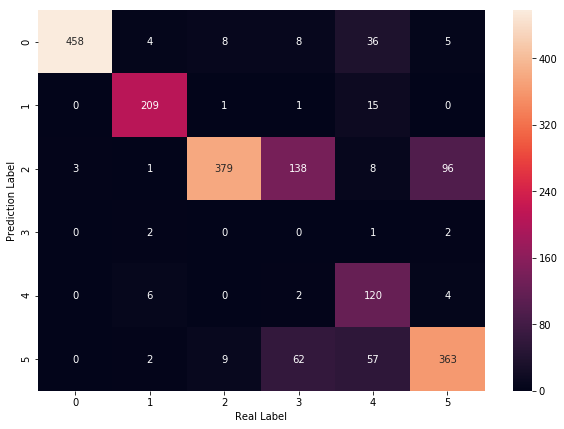

In [17]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [18]:

def get_pred_train(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = X[j]
    test_y = y[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs


# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []


for j in range(4435):
    pred = []
    for i in range(31):
        [pred_outputs] = get_pred_train(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(6):
        error.append(31 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
train_acc = np.sum(list_P == y)/4435
print("Test Accuracy:{}".format(train_acc))

winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
avg_train_acc = np.mean(winner_fitness)
print("Avg Train Accuracy:{}".format(avg_train_acc))


# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
total_nodes = np.sum(list_nodes_number)
total_connections = np.sum(list_connection_number)
print("Total nodes:{} Total connections::{}".format(total_nodes, total_connections))


for item in [avg_train_acc, train_acc, test_acc, total_nodes, total_connections]:
    print(item)

Test Accuracy:0.8015783540022547
Avg Train Accuracy:0.846266865476234
Total nodes:582 Total connections::1624
0.846266865476234
0.8015783540022547
0.7645
582
1624


In [28]:
winner_fitness

[0.9677564825253664,
 0.7237880496054115,
 0.9052987598647125,
 0.6863585118376551,
 0.876662908680947,
 0.7397970687711387,
 0.8178128523111612,
 0.7770011273957159,
 0.8342728297632469,
 0.8669673055242391,
 0.7799323562570463,
 0.8958286358511838,
 0.8444193912063134,
 0.9591882750845547,
 0.8045095828635851,
 0.9898534385569335,
 0.9488162344983089,
 0.801803833145434,
 0.9346110484780158,
 0.8214205186020294,
 0.864261555806088,
 0.7307779030439684,
 0.8626832018038332,
 0.9350620067643743,
 0.7977452085682074,
 0.8036076662908681,
 0.8200676437429538,
 0.9068771138669673,
 0.7887260428410372,
 0.9032694475760992,
 0.8450958286358512]

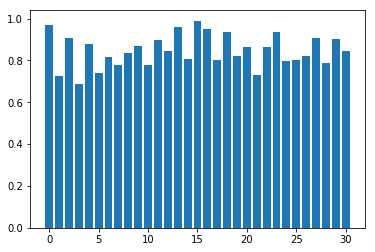

In [20]:
plt.bar(range(31),winner_fitness)
plt.show()